In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
#Importing the dataset
path = "/content/drive/MyDrive/Colab Notebooks/CSE422/heart.csv"
heart_df = pd.read_csv(path)
df=heart_df.copy()
heart_df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
heart_df.shape # There are 14 columns and 1025 rows in the dataset

(1025, 14)

In [ ]:
num_data_points = heart_df.shape[0]
print(num_data_points)

1025


## **Handling Null or Missing values**

In [ ]:
heart_df.isnull().sum() # As there is no null value in the dataset, there is no need to remove null values
#No missing data need to be handled

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### **Dataset is imbalanced or not?**

1    526
0    499
Name: target, dtype: int64


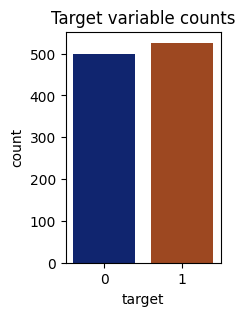

In [ ]:
target_counts = heart_df['target'].value_counts()
plt.figure(figsize=(2,3))
sns.barplot(x=target_counts.index, y=target_counts.values, palette="dark")


plt.xlabel('target')
plt.ylabel('count')
plt.title('Target variable counts')
print(target_counts)
plt.show()

### **Correlation Matrix**

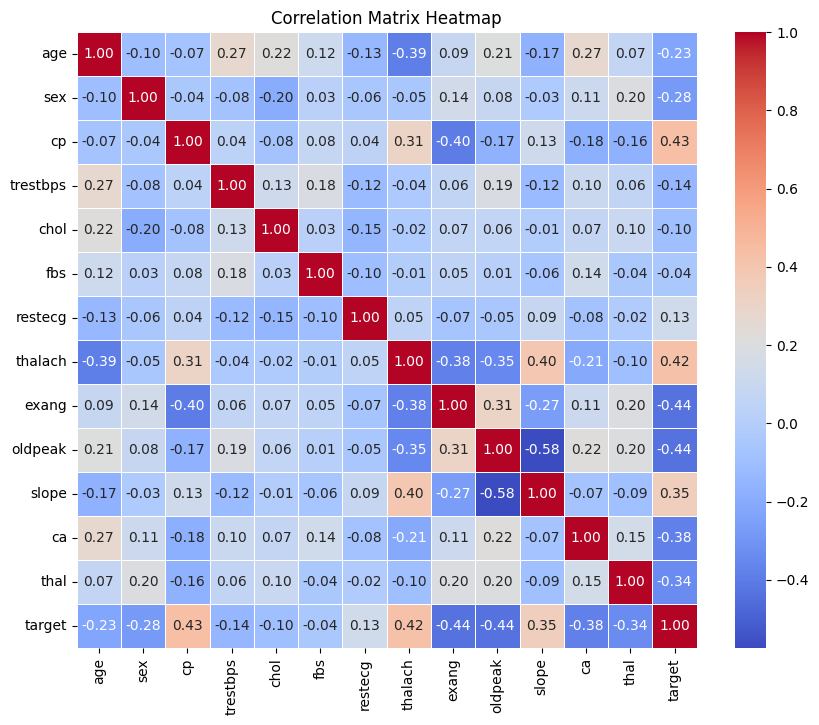

In [ ]:
correlation_matrix = heart_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


## **Encoding Categorical Variables**

In [ ]:
print("cp column has unique values such as:",heart_df['cp'].unique())
print("restecg column has unique values such as:",heart_df['restecg'].unique())
print("ca column has unique values such as:",heart_df['ca'].unique())
print("thal column has unique values such as:",heart_df['thal'].unique())

cp column has unique values such as: [0 1 2 3]
restecg column has unique values such as: [1 0 2]
ca column has unique values such as: [2 0 1 3 4]
thal column has unique values such as: [3 2 1 0]


In [ ]:
# category_enc1 = pd.get_dummies(heart_df['cp'])
# category_enc1.tail()

In [ ]:

# category_enc1.rename(columns = {0:'cpt1', 1:'cpt2', 2:'cpt3', 3:'cpt4'}, inplace = True)
# heart_df = heart_df.drop('cp', axis=1)
# heart_df = pd.concat([heart_df, category_enc1], axis=1)
# heart_df.tail()

In [ ]:
category_enc2 = pd.get_dummies(heart_df['restecg'])
category_enc2.head()

,0,1,2
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0


In [ ]:
category_enc2.rename(columns = {0:'restecg1', 1:'restecg2', 2:'restecg3'}, inplace = True)
heart_df = heart_df.drop('restecg', axis=1)
heart_df = pd.concat([heart_df, category_enc2], axis=1)
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target,restecg1,restecg2,restecg3
0,52,1,0,125,212,0,168,0,1.0,2,2,3,0,0,1,0
1,53,1,0,140,203,1,155,1,3.1,0,0,3,0,1,0,0
2,70,1,0,145,174,0,125,1,2.6,0,0,3,0,0,1,0
3,61,1,0,148,203,0,161,0,0.0,2,1,3,0,0,1,0
4,62,0,0,138,294,1,106,0,1.9,1,3,2,0,0,1,0


In [ ]:
# category_enc3 = pd.get_dummies(heart_df['ca'])
# category_enc3.head()

In [ ]:
# category_enc3.rename(columns = {0:'cat1', 1:'cat2', 2:'cat3', 3:'cat4', 4:'cat5'}, inplace = True)
# heart_df = heart_df.drop('ca', axis=1)
# heart_df = pd.concat([heart_df, category_enc3], axis=1)
# heart_df.head()

In [ ]:
category_enc4 = pd.get_dummies(heart_df['thal'])
category_enc4.head()

,0,1,2,3
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0


In [ ]:
category_enc4.rename(columns = {0:'thal1', 1:'thal2', 2:'thal3', 3:'thal4'}, inplace = True)
heart_df = heart_df.drop('thal', axis=1)
heart_df = pd.concat([heart_df, category_enc4], axis=1)
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,restecg1,restecg2,restecg3,thal1,thal2,thal3,thal4
0,52,1,0,125,212,0,168,0,1.0,2,2,0,0,1,0,0,0,0,1
1,53,1,0,140,203,1,155,1,3.1,0,0,0,1,0,0,0,0,0,1
2,70,1,0,145,174,0,125,1,2.6,0,0,0,0,1,0,0,0,0,1
3,61,1,0,148,203,0,161,0,0.0,2,1,0,0,1,0,0,0,0,1
4,62,0,0,138,294,1,106,0,1.9,1,3,0,0,1,0,0,0,1,0


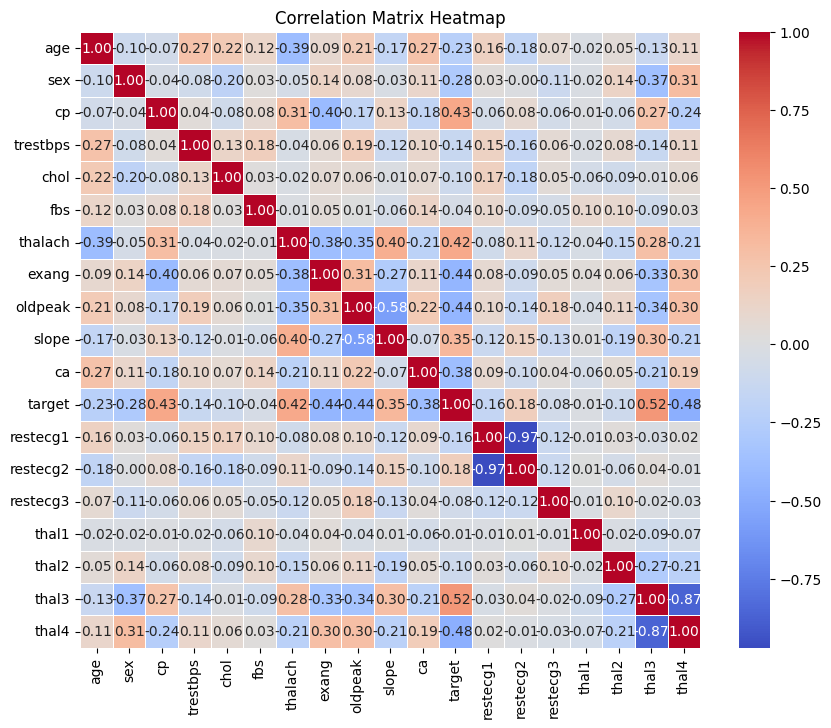

In [ ]:
correlation_matrix = heart_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

## **Feature Scaling**

In [ ]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
            'oldpeak', 'slope', 'ca', 'restecg1', 'restecg2', 'restecg3',
            'thal1', 'thal2', 'thal3', 'thal4']
x = heart_df[features]  # features columns
y = heart_df['target']  # it is target variable

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [ ]:

logistic_classifier = LogisticRegression(max_iter=2000)


logistic_classifier.fit(x_train, y_train)


logistic_y_pred = logistic_classifier.predict(x_test)

# Evaluate the accuracy of the classifier
logistic_accuracy = metrics.accuracy_score(y_test, logistic_y_pred)
print(f"Accuracy: {logistic_accuracy}")

Accuracy: 0.8571428571428571


In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)

x_test_scaled = scaler.transform(x_test)

#train
logistic_classifier.fit(x_train_scaled, y_train)


logistic_y_pred = logistic_classifier.predict(x_test_scaled)
# scoring on the scaled test set
logistic_accuracy = metrics.accuracy_score(y_test, logistic_y_pred)
print(f"Accuracy: {logistic_accuracy}")

Accuracy: 0.8506493506493507


In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)

x_test_scaled = scaler.transform(x_test)

#train
logistic_classifier.fit(x_train_scaled, y_train)


logistic_y_pred = logistic_classifier.predict(x_test_scaled)
# scoring on the scaled test set
logistic_accuracy = metrics.accuracy_score(y_test, logistic_y_pred)
print(f"Accuracy: {logistic_accuracy}")

Accuracy: 0.8603896103896104


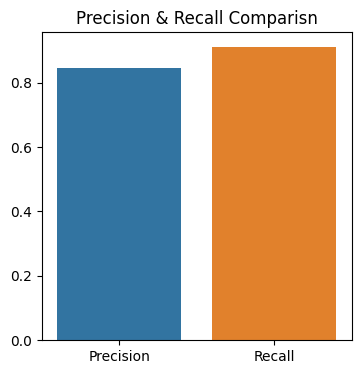

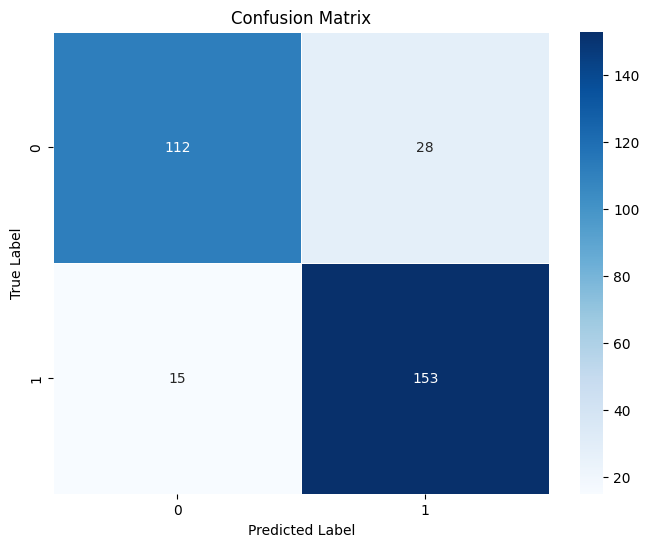

In [ ]:
precision = precision_score(y_test, logistic_y_pred)
recall = recall_score(y_test, logistic_y_pred)



accuracy = metrics.accuracy_score(y_test, logistic_y_pred)
plt.figure(figsize=(4, 4))
sns.barplot(x=['Precision', 'Recall'], y=[precision, recall])
plt.title('Precision & Recall Comparisn')
plt.show()


#Confusion Matrix
conf_matrix = confusion_matrix(y_test, logistic_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)

In [ ]:
knn_classifier = KNeighborsClassifier()

knn_classifier.fit(x_train_scaled, y_train)

knn_y_pred = knn_classifier.predict(x_test_scaled)

accuracy = accuracy_score(y_test, knn_y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.5097402597402597


In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)

x_test_scaled = scaler.transform(x_test)

knn_classifier.fit(x_train_scaled, y_train)

knn_y_pred = knn_classifier.predict(x_test_scaled)

# Calculate accuracy
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"KNN Accuracy: {knn_accuracy}")

KNN Accuracy: 0.827922077922078


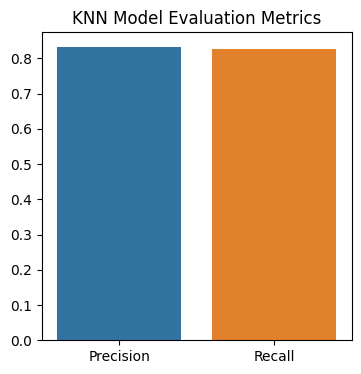

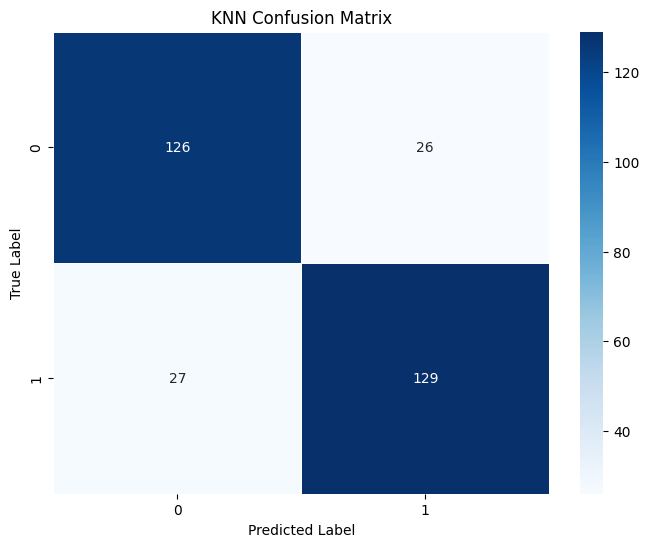

In [ ]:
precision = precision_score(y_test, knn_y_pred)
recall = recall_score(y_test, knn_y_pred)
plt.figure(figsize=(4,4))
sns.barplot(x=['Precision', 'Recall'], y=[ precision, recall])
plt.title('KNN Model Evaluation Metrics')

plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, knn_y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=32)

naive_bayes_classifier = GaussianNB()


naive_bayes_classifier.fit(x_train, y_train)
nb_y_pred = naive_bayes_classifier.predict(x_test)

# Calculate accuracy
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print(f"Naive Bayes Accuracy: {nb_accuracy}")



Naive Bayes Accuracy: 0.8441558441558441


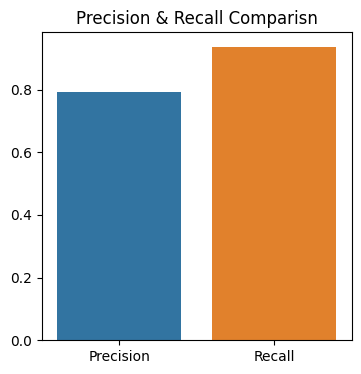

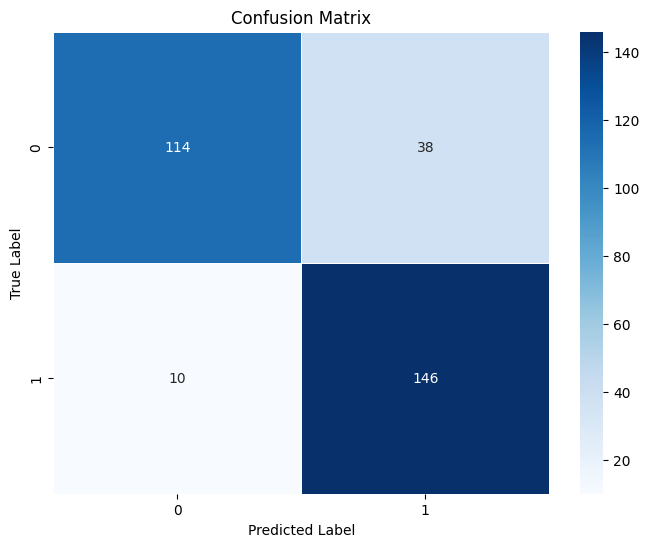

In [ ]:
precision = precision_score(y_test, nb_y_pred)
recall = recall_score(y_test, nb_y_pred)



accuracy = metrics.accuracy_score(y_test, nb_y_pred)
plt.figure(figsize=(4, 4))
sns.barplot(x=['Precision', 'Recall'], y=[precision, recall])
plt.title('Precision & Recall Comparisn')
plt.show()


#Confusion Matrix
conf_matrix = confusion_matrix(y_test, nb_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracies --> Naive Bayes: 0.8441558441558441, K-Nearest Neighbors: 0.827922077922078, Logistic Regression: 0.8603896103896104


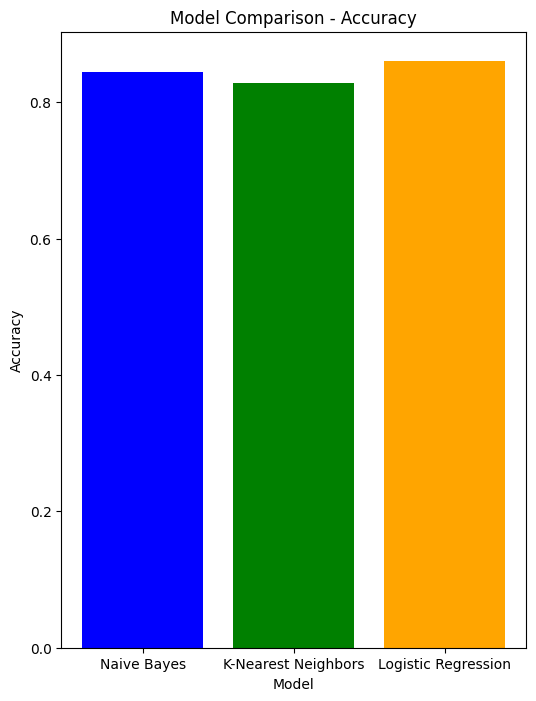

In [ ]:

models = ['Naive Bayes', 'K-Nearest Neighbors', 'Logistic Regression']

accuracies = [nb_accuracy, knn_accuracy, logistic_accuracy]

plt.figure(figsize=(6,8))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])

plt.title('Model Comparison - Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')

print("Accuracies --> Naive Bayes: {}, K-Nearest Neighbors: {}, Logistic Regression: {}".format(nb_accuracy,knn_accuracy,logistic_accuracy))
plt.show()